<a href="https://colab.research.google.com/github/Aryan95614/Pytorch-Lessons/blob/RUNTHISFILE/Pytorch_Tutorial_2_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [198]:
# Making sure that Pytorch is here Installed
import torch 

print(torch.__version__)

1.13.0+cu116


The essence of machine learning and deep learning is to take some data from the past, build an algorithm (like a neural network) to discover patterns in it and use the discoverd patterns to predict the future.

There are many ways to do this and many new ways are being discovered all the time.

But let's start small.

How about we start with a straight line?

And we see if we can build a PyTorch model that learns the pattern of the straight line and matches it.

For now, we'll use this workflow to predict a simple straight line but the workflow steps can be repeated and changed depending on the problem you're working on.

[Basic Flow Diagram of what we are supposed to do](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01_a_pytorch_workflow.png)

In [199]:

from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

##1. Data (preparing and loading)
I want to stress that "data" in machine learning can be almost anything you can imagine. A table of numbers (like a big Excel spreadsheet), images of any kind, videos (YouTube has lots of data!), audio files like songs or podcasts, protein structures, text and more.

Machine learning is a game of two parts:

Turn your data, whatever it is, into numbers (a representation).
Pick or build a model to learn the representation as best as possible.
Sometimes one and two can be done at the same time.

But what if you don't have data?

Well, that's where we're at now.

No data.

But we can create some.

##Linear regression

[link to gradient descent](https://www.wikiwand.com/en/Gradient_descent)

In [200]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) #Returns a new tensor with a dimension of size one inserted at the specified position.
y = weight * X + bias

print(X[:10])
print(y[:10])



tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])


Beautiful! Now we're going to move towards building a model that can learn the relationship between X (features) and y (labels).

Split data into training and test sets
We've got some data.

But before we build a model we need to split it up.

One of most important steps in a machine learning project is creating a training and test set (and when required, a validation set).

Each split of the dataset serves a specific purpose:



In general, putting 80% of the data in the training set, 10% in the validation set, and 10% in the test set is a good split to start with. The optimum split of the test, validation, and train set depends upon factors such as the use case, the structure of the model, dimension of the data, etc.

In [201]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing 
X_train, y_train = X[:train_split], y[:train_split] # that starting
X_test, y_test = X[train_split:], y[train_split:] # that ongoing

print(len(X_train)) # 40
print(len(y_train)) # 40
print(len(X_test)) # 10
print(len(y_test)) # 10

40
40
10
10



Wonderful, we've got 40 samples for training (X_train & y_train) and 10 samples for testing (X_test & y_test).

The model we create is going to try and learn the relationship between X_train & y_train and then we will evaluate what it learns on X_test and y_test.

But right now our data is just numbers on a page.

Let's create a function to visualize it.

Note: Now's a good time to introduce you to the data explorer's motto... "visualize, visualize, visualize!"

Think of this whenever you're working with data and turning it into numbers, if you can visualize something, it can do wonders for understanding.

Machines love numbers and we humans like numbers too but we also like to look at things.

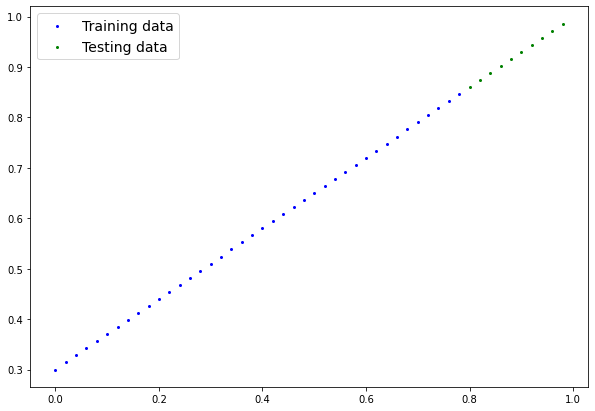

In [202]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  
  plt.figure(figsize=(10, 7))

  
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")# Plot training data in blue
  
 
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data") # Plot test data in green

  if predictions is not None:   
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions") # Plot the predictions in red (predictions were made on the test data)

  # Show the legend
  plt.legend(prop={"size": 14})
plot_predictions()


##2. Build model
Now we've got some data, let's build a model to use the blue dots to predict the green dots. We're going to jump right in. We'll write the code first and then explain everything. Let's replicate a standard linear regression model using pure PyTorch.

In [203]:

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__() 
        # We will be able to access this by an already ordered dictionary that has been created
        self.weights = nn.Parameter(torch.randn(1, #amount of weights
                                                dtype=torch.float), # Between 0 and 1
                                   requires_grad=True) # will be good for gradient descent

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    
    def forward(self, x: torch.Tensor) -> torch.Tensor: # gets input tensor then returns tensor
        #needs to override the parent method
        return self.weights * x + self.bias # Basic formulae

'''
torch.optim:
Contains various optimization algorithms (these tell the model parameters 
stored in nn.Parameter how to best change to improve gradient descent and 
in turn reduce the loss).

torch.nn.Parameter:
Stores tensors that can be used with nn.Module. If requires_grad=True gradients
(used for updating model parameters via gradient descent) are calculated 
automatically, this is often referred to as "autograd".
'''

'\ntorch.optim:\nContains various optimization algorithms (these tell the model parameters \nstored in nn.Parameter how to best change to improve gradient descent and \nin turn reduce the loss).\n\ntorch.nn.Parameter:\nStores tensors that can be used with nn.Module. If requires_grad=True gradients\n(used for updating model parameters via gradient descent) are calculated \nautomatically, this is often referred to as "autograd".\n'

In [204]:
# Set manual seed since nn.Parameter are randomly initialzied
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
print(list(model_0.parameters()))

# Seeing what values are already in the model in an ordered dictinionary
print(model_0.state_dict())

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]
OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


Notice how the values for weights and bias from model_0.state_dict() come out as random float tensors? You know, the ones that we already had selected with our random seed.

This is becuase we initialized them above using torch.randn().

Essentially we want to start from random parameters and get the model to update them towards parameters that fit our data best (the hardcoded weight and bias values we set when creating our straight line data).



##Making predictions using torch.inference_mode()
To check this we can pass it the test data X_test to see how closely it predicts y_test.

When we pass data to our model, it'll go through the model's forward() method and produce a result using the computation we've defined.

Let's make some predictions.

In [205]:
with torch.inference_mode(): # this basically gears the laptop to just start guessing now
    y_preds = model_0(X_test)

As the name suggests, torch.inference_mode() is used when using a model for inference (making predictions).

torch.inference_mode() turns off a bunch of things (like gradient tracking, which is necessary for training but not for inference) to make forward-passes (data going through the forward() method) faster.

In [206]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}") 
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


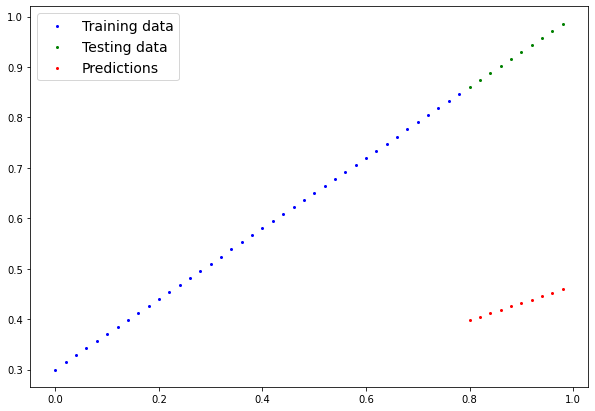

In [207]:
plot_predictions(predictions=y_preds)

##3. Train model
Right now our model is making predictions using random parameters to make calculations, it's basically guessing (randomly).

To fix that, we can update its internal parameters (I also refer to parameters as patterns), the weights and bias values we set randomly using nn.Parameter() and torch.randn() to be something that better represents the data.

We could hard code this (since we know the default values weight=0.7 and bias=0.3) but where's the fun in that?

Much of the time you won't know what the ideal parameters are for a model.

Instead, it's much more fun to write code to see if the model can try and figure them out itself.


##Creating a loss function and optimizer in PyTorch
For our model to update its parameters on its own, we'll need to add a few more things to our recipe.

And that's a loss function as well as an optimizer.

The roles of these are:

Loss function : Find in torch.nn. Measures how wrong your models predictions (e.g. y_preds) are compared to the truth labels (e.g. y_test). Lower the better. **Some common values are Mean absolute error (MAE) for regression problems (torch.nn.L1Loss()).Binary cross entropy for binary classification problems (torch.nn.BCELoss()).**

Optimizer: Find in torch.optim. Tells your model how to update its internal parameters to best lower the loss. **Some examples are Stochastic gradient descent (torch.optim.SGD()). Adam optimizer (torch.optim.Adam()).**



However, there are some common values, that are known to work well such as the SGD (stochastic gradient descent) or Adam optimizer. And the MAE (mean absolute error) loss function for regression problems (predicting a number) or binary cross entropy loss function for classification problems (predicting one thing or another).

##For our problem, **since we're predicting a number, let's use MAE (which is under torch.nn.L1Loss()) in PyTorch as our loss function.**

Mean absolute error (MAE, in PyTorch: torch.nn.L1Loss) measures the absolute difference between two points (predictions and labels) and then takes the mean across all examples.

And we'll use SGD, torch.optim.SGD(params, lr) where:
- params is the target model parameters you'd like to optimize (e.g. the weights and bias values we randomly set before).
- lr is the learning rate you'd like the optimizer to update the parameters at, higher means the optimizer will try larger updates (these can sometimes be too large and the optimizer will fail to work), lower means the optimizer will try smaller updates (these can sometimes be too small and the optimizer will take too long to find the ideal values). 
- The learning rate is considered a hyperparameter (because it's set by a machine learning engineer). Common starting values for the learning rate are 0.01, 0.001, 0.0001, however, these can also be adjusted over time (this is called learning rate scheduling).


##Creating an optimization loop in PyTorch

Woohoo! Now we've got a loss function and an optimizer, it's now time to create a training loop (and testing loop).

The training loop involves the model going through the training data and learning the relationships between the features and labels.

The testing loop involves going through the testing data and evaluating how good the patterns are that the model learned on the training data (the model never see's the testing data during training).

Each of these is called a "loop" because we want our model to look (loop through) at each sample in each dataset.

In [208]:
# Create the loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss


optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.005) # learning rate, right now no learning rate scheduling
 # Remember this https://www.learnpytorch.io/01_pytorch_workflow/#pytorch-training-loop                            

In [209]:
torch.manual_seed(42)


epochs = 601

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    
    model_0.train()

   
    y_pred = model_0(X_train) # predict

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step() # Tell me what I have to change after going into the nn

    
    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      
      test_pred = model_0(X_test)

      
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      
      if epoch % 100 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} | Success Rate: {1 - test_loss}")      

Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.4878006875514984 | Success Rate: 0.5121992826461792
Epoch: 100 | MAE Train Loss: 0.041651852428913116 | MAE Test Loss: 0.10024197399616241 | Success Rate: 0.8997580409049988
Epoch: 200 | MAE Train Loss: 0.024415848776698112 | MAE Test Loss: 0.056821130216121674 | Success Rate: 0.9431788921356201
Epoch: 300 | MAE Train Loss: 0.007245116867125034 | MAE Test Loss: 0.016491109505295753 | Success Rate: 0.9835088849067688
Epoch: 400 | MAE Train Loss: 0.001977377338334918 | MAE Test Loss: 0.0024690269492566586 | Success Rate: 0.997530996799469
Epoch: 500 | MAE Train Loss: 0.001977377338334918 | MAE Test Loss: 0.0024690269492566586 | Success Rate: 0.997530996799469
Epoch: 600 | MAE Train Loss: 0.001977377338334918 | MAE Test Loss: 0.0024690269492566586 | Success Rate: 0.997530996799469


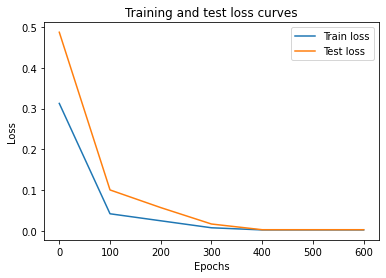

In [210]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

Well, thanks to our loss function and optimizer, the model's internal parameters (weights and bias) were updated to better reflect the underlying patterns in the data.

Let's inspect our model's .state_dict() to see see how close our model gets to the original values we set for weights and bias.

In [211]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.6974])), ('bias', tensor([0.3048]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


4. Making predictions with a trained PyTorch model (inference)
Once you've trained a model, you'll likely want to make predictions with it.

We've already seen a glimpse of this in the training and testing code above, the steps to do it outside of the training/testing loop are similar.

There are three things to remember when making predictions (also called performing inference) with a PyTorch model:

Set the model in evaluation mode (model.eval()).
- Make the predictions using the inference mode context manager (with torch.inference_mode(): ...).
- All predictions should be made with objects on the same device (e.g. data and model on GPU only or data and model on CPU only).
- The first two items make sure all helpful calculations and settings PyTorch uses behind the scenes during training but aren't necessary for inference are turned off (this results in faster computation). And the third ensures that you won't run into cross-device errors.

In [212]:
model_0.eval()

with torch.inference_mode():
  y_preds = model_0(X_test)
print(y_preds)

tensor([[0.8627],
        [0.8767],
        [0.8906],
        [0.9045],
        [0.9185],
        [0.9324],
        [0.9464],
        [0.9603],
        [0.9743],
        [0.9882]])


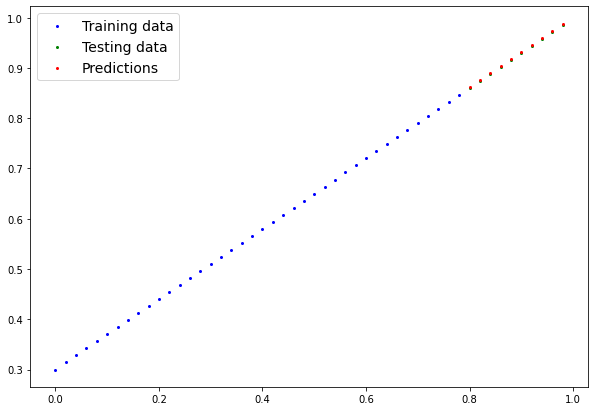

In [213]:
plot_predictions(predictions=y_preds)

##5. Saving and loading a PyTorch model
If you've trained a PyTorch model, chances are you'll want to save it and export it somewhere.

As in, you might train it on Google Colab or your local machine with a GPU but you'd like to now export it to some sort of application where others can use it.

Or maybe you'd like to save your progress on a model and come back and load it back later.

For saving and loading models in PyTorch, there are three main methods you should be aware of (all of below have been taken from the PyTorch saving and loading models guide):

Note: As stated in Python's pickle documentation, the pickle module is not secure. That means you should only ever unpickle (load) data you trust. That goes for loading PyTorch models as well. Only ever use saved PyTorch models from sources you trust.


Saving a PyTorch model's state_dict()
The recommended way for saving and loading a model for inference (making predictions) is by saving and loading a model's state_dict().

Let's see how we can do that in a few steps:

We'll create a directory for saving models to called models using Python's pathlib module.
We'll create a file path to save the model to.
We'll call torch.save(obj, f) where obj is the target model's state_dict() and f is the filename of where to save the model.
Note: It's common convention for PyTorch saved models or objects to end with .pt or .pth, like saved_model_01.pth.

In [214]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH) 

Saving model to: models/01_pytorch_workflow_model_0.pth



Loading a saved PyTorch model's state_dict()
Since we've now got a saved model state_dict() at models/01_pytorch_workflow_model_0.pth we can now load it in using torch.nn.Module.load_state_dict(torch.load(f)) where f is the filepath of our saved model state_dict().

Why call torch.load() inside torch.nn.Module.load_state_dict()?

Because we only saved the model's state_dict() which is a dictionary of learned parameters and not the entire model, we first have to load the state_dict() with torch.load() and then pass that state_dict() to a new instance of our model (which is a subclass of nn.Module).

Why not save the entire model?

Saving the entire model rather than just the state_dict() is more intuitive, however, to quote the PyTorch documentation (italics mine):

The disadvantage of this approach (saving the whole model) is that the serialized data is bound to the specific classes and the exact directory structure used when the model is saved...

Because of this, your code can break in various ways when used in other projects or after refactors.

So instead, we're using the flexible method of saving and loading just the state_dict(), which again is basically a dictionary of model parameters.

Let's test it out by created another instance of LinearRegressionModel(), which is a subclass of torch.nn.Module and will hence have the in-built method load_state_dit()

In [215]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH)) # https://www.learnpytorch.io/01_pytorch_workflow/ This already works so no need to test the predictions again


<All keys matched successfully>

##6. Putting it all together
We've covered a fair bit of ground so far.

But once you've had some practice, you'll be performing the above steps like dancing down the street.

Speaking of practice, let's put everything we've done so far together.

Except this time we'll make our code device agnostic (so if there's a GPU available, it'll use it and if not, it will default to the CPU).

There'll be far less commentary in this section than above since what we're going to go through has already been covered.

We'll start by importing the standard libraries we need.
If you want to do it on a gpu, just click the link and plug it in. 
